In [ ]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

# **ASI WA Python Workshop**

## **Jupyter Notebook Tips**

Outside of a cell:

| key combo | action |
| :--: | ---- |
| shift+enter |  run a cell |
| b |  insert cell below | 
| a |  insert cell above |
| dd | delete selected cell |

<br>
Within a cell:

| key combo | action |
| :--: | ---- |
| Command + / |  comment out line(s) |
| Alt + Cursor | vertical selection |

**Control = Command
<br><br><br>

---

# **Pandas**

Pandas is a very popular Python package that is like the Excel or Tidyverse for Python, allowing you to easily manipulate and analyze tabular data, perform calculations, and apply data transformations using a familiar interface. 

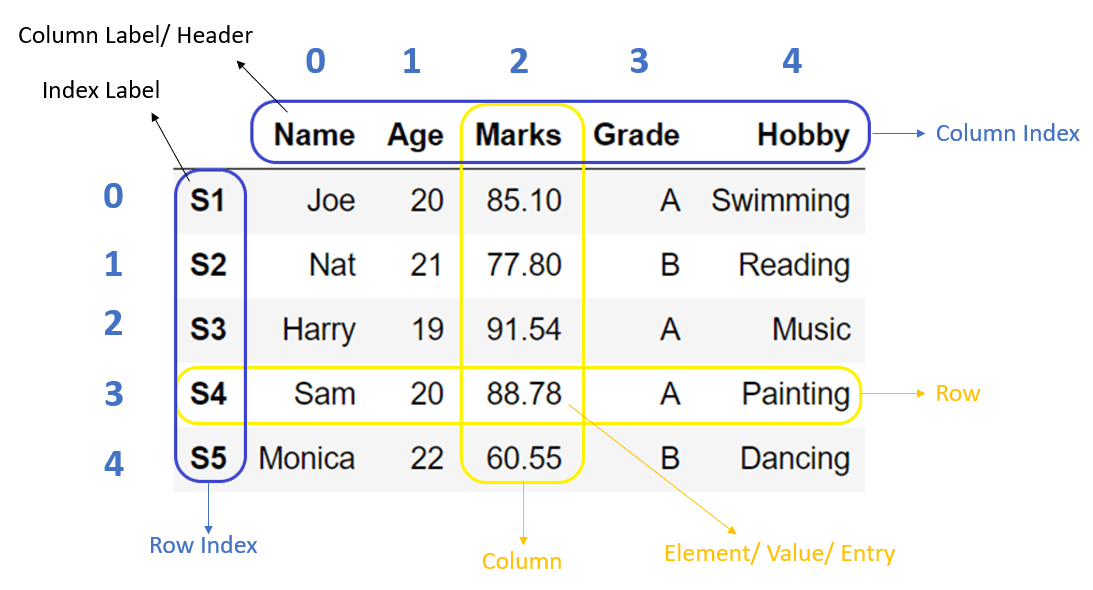

Pandas, similar to NumPy, is typically imported using the shorthand pd for convenience and brevity in code.

In [ ]:
import pandas as pd

## **Series**
Like an array or a list, a Pandas Series is a one-dimensional labeled array that can hold different data types and is often compared to a column in a spreadsheet or a single column from a database table.

We can create a pandas series using a list or numpy array.

In [ ]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

In [ ]:
import numpy as np

names = pd.Series(np.array(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"]))
names

<br>

## **DataFrame**

A Pandas DataFrame is a two-dimensional labeled data structure that can store heterogeneous data types. It can be thought of as a table or a spreadsheet, where rows represent observations and columns represent variables or features.

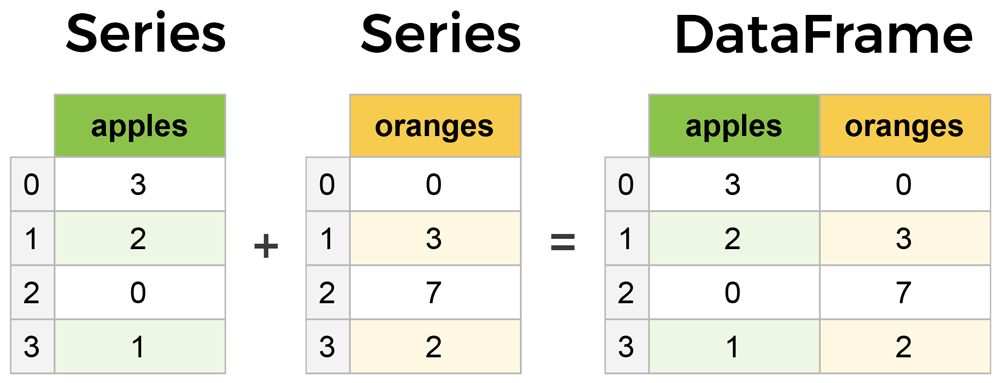


### Creating
At its core, a DataFrame in Pandas is a two-dimensional data structure built on top of a NumPy ndarray, with the added feature of labels for both rows and columns.

In [ ]:
import numpy as np

# Create a NumPy ndarray
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Create a DataFrame from the ndarray
df1 = pd.DataFrame(data)
# add column labels
df1.columns = ['col1','col2','col3']
# add index labels
df1.index = ['row1','row2','row3']

# Print the DataFrame
print(df1)

We can also set the labels within the dataframe function

In [ ]:
df = pd.DataFrame( np.random.randint(0, 100, (3,3)), index=['row1','row2','row3'], columns=['col1','col2','col3'])
print(df)

We can easily add another column

In [ ]:
df['new_col'] = [1,2,3]
df['rm_col'] = [4,5,6]
df

We can also easily drop columns with `.drop()`

In [ ]:
df.drop( columns='rm_col', inplace=True)
df

And rename the columns

In [ ]:
df.columns = ['apple','bee','cat','dice']
df

<br>

### Meta data
When working with a Pandas DataFrame, you can access important metadata attributes such as columns, index, and shape. These attributes provide valuable information about the structure, labels, and dimensions of the DataFrame, allowing you to better understand and analyze the data.

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.shape

In [ ]:
df.info()

### Pulling Columns
We can index a column with `[]` string to return a series

```series = dataframe[string]```

In [ ]:
df

In [ ]:
df['cat']

Or we can return a column using `.` and a column name

```series = dataframe.string```

In [ ]:
df.cat

We can also pass a list of column names as strings

```sub-dataframe = dataframe[[string1,string2,string3]]```

In [ ]:
df[ ['bee','dice'] ]

<br>

#### *Task 6.1: Create a pandas dataframe*

1. Create DataFrame presented below, and index the 'movie_title' column.
```
                                         movie_title  imdb_score
0                                            Avatar          7.9
1          Pirates of the Caribbean: At World's End          7.1
2                                           Spectre          6.8
```

In [ ]:
# Task 6.1.1



2. display the column imdb_score

In [ ]:
# Task 6.1.2



3. Change the columns to col1 and col2

In [ ]:
# Task 6.1.3



---

<br>

## Reading in Data

One of the key functionalities of pandas is the ability to read in data from various file formats, such as CSV, Excel, SQL databases, and more.

To read in data using pandas, you can use the `read_*` functions provided by the library. These functions allow you to import data from different file formats into pandas data structures, such as DataFrames and Series.

In [ ]:
# Uncomment and press tab..
# pd.read_

In [ ]:
# pd.read_csv?

<br>

#### *Task 6.2: Load .csv Data*
1. Load "./data/movies.csv" to variable called `movies` using pandas `.read_csv()`. Use the dataframe functions `.head()` and `.tail()` to take a peak at the imported data.

In [ ]:
# Task 6.2.1

# pd.read_csv( './data/movies.csv')


2. Pull the shape dimensions and then columns it has.

In [ ]:
# Task 6.2.2



The 'describe()' function in pandas calculates various statistical measures of the **numrical data** and presents them in a structured output.

Here's an overview of what the describe() function does:

- Count: It returns the count of non-null values in each column, providing an idea of the completeness of the data.

- Mean: It calculates the mean (average) of the values in each column, which represents the central tendency of the data.

- Standard Deviation: It computes the standard deviation, which measures the spread or dispersion of the data around the mean.

- Minimum: It gives the minimum value in each column, representing the smallest observed value.

- 25th Percentile (Q1): It calculates the value below which 25% of the data falls, also known as the first quartile or lower quartile.

- Median (Q2): It provides the median value, which is the middle value in a sorted dataset. It divides the data into two halves, with 50% falling below and 50% above the median.

- 75th Percentile (Q3): It calculates the value below which 75% of the data falls, also known as the third quartile or upper quartile.

- Maximum: It gives the maximum value in each column, representing the largest observed value.

3. Run the describe function on the movies dataframe.

In [ ]:
# Task 6.2.3



---

<br>

## Indexing
There are two primary indexing methods in pandas DataFrame:

- `iloc`: Like we have seen before, the `.iloc` (or *integer location*) indexer is used for integer-based indexing, allowing you to access data based on the integer positions of rows and columns. It uses zero-based indexing, where the first row or column has a position of 0. You can use integer slices, lists, or boolean arrays to select specific rows or columns using iloc.

- `loc`: The `.loc` (or *location*) indexer is used for label-based indexing, allowing you to access data based on the row and column labels. With loc, you can refer to rows or columns using their specific labels instead of integer positions. You can use label slices, lists, or boolean arrays to select specific rows or columns using loc.

Both of these indexing methods use the same `[,]` notation we have seen before:

`dataframe.iloc[row_index,column_index]`

`dataframe.loc[row_name,column_name]`

In [ ]:
# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, 35, 40, 45],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']}
df = pd.DataFrame(data, index=['A', 'B', 'C', 'D', 'E'])
df

In [ ]:
# Using iloc to access data by integer positions
df.iloc[2]  # Access the third row

In [ ]:
# Using loc to access data by label names
print(df.loc['C'])  # Access the row with label 'C'

In [ ]:
print(df.iloc[:,1])  # Access the second column

In [ ]:
print(df.loc[:,'Age'])  # Access the column with label 'Age'

<br>

#### *Task 6.3: Retrieve specific subsets of data from the DataFrame*
1. Use `iloc` to select the first three rows and the last two columns from df (above)

In [ ]:
# Task 6.3.1
print(df)



2. Use `loc` to select rows with Age greater than 30 and the 'Name' and 'City' columns from df

In [ ]:
# Task 6.3.2




---

<br>

## Filtering Data

Lets create a dataframe to filter. We will create it from the two pandas series we created at the start, strengths and names.

In [ ]:
heroes = pd.DataFrame(
        {'strength' : strengths,
         'hero' : names
        })
heroes

### Boolean indexing
Like numpy, pandas supports boolean indexing

Conditioning a column will create a bool mask.

In [ ]:
heroes['strength']==400

Which we can use the subselect our dataframe. 

In [ ]:
heroes[heroes['strength']==400]

We can of course use any conditional operator we like.

In [ ]:
heroes[heroes['strength']>400]

### Multiple conditions
**Pandas boolean indexing allows you to filter data based on multiple conditions, but like numpy, the comparisons are performed element-wise (element-to-element). Logical combinations using `&` and `|` are used for performing the logical AND and OR operations between elements. We can not use `and` or `or`.** 

The full syntax is:

`(condition1) & (condition2)`

In [ ]:
# two conditions with AND operator
heroes[(heroes['strength'] > 200) & (heroes['strength'] < 400)]

In [ ]:
# two conditions with OR operator
heroes[(heroes['strength'] <= 200) | (heroes['strength'] >= 400)]

### Negation

As with numpy, pandas recognizes the `~` is a negation operator

In [ ]:
~(heroes['strength'] == 400)

In [ ]:
heroes['strength'] != 400

In [ ]:
heroes[~((heroes['strength'] <= 200) | (heroes['strength'] >= 400))]

### `.isin()`
The `isin()` function is a convenient method for filtering data based on whether values from a column/row is present in a given list or other iterable. It acts like a conditional statement and returns a bool mask. 

In [ ]:
heroes[heroes['hero'].isin(['Batman', 'Robin'])]

<br>

#### *Task 6.4: Filtering Data*

1. Using the movies dataframe we read in previously, find how many movies were directed by Clint Eastwood or James Cameron?

In [ ]:
# Task 6.4.1


2. What movies have earned above $500m?

In [ ]:
# Task 6.4.2


3. Are there any Polish movies?

In [ ]:
# Task 6.4.3


4. What are really popular great movies? (> 100k FB likes, > 8.5 IMDB score)

In [ ]:
# Task 6.4.4


---

<br>

## Exporting data

### We can convert the contents of the dataframe to a numpy array.

In [ ]:
heroes.values

### We can save the dataframe as a csv or other files types

In [ ]:
heroes.to_csv('data/heroes.csv', index=False)

---

<br>

#### *Task 6.5: Saving a Dataframe*
Create a csv with movie titles and cast (actors) of movies with budget above $200m

In [ ]:
# Task 6.5



---

<br>

## **Vector operations**
Mathematical operators work much like numpy operators, element wise. 

In [ ]:
heroes

In [ ]:
heroes['strength'] * 2

In [ ]:
heroes['height'] = [180, 170, 175, 190, 185]

In [ ]:
heroes['strength'] / heroes['height']

In [ ]:
heroes['strength_per_cm'] = heroes['strength'] / heroes['height']
heroes

### Sorting and value counts

In [ ]:
heroes['strength'].value_counts()

In [ ]:
heroes.sort_values('strength')

In [ ]:
heroes.sort_values(
    ['strength','height'],
    ascending=[False, True]
)

---

<br>

#### *Task 6.5: Sorting a Dataframe*

What are 10 most profitable movies? (ratio between gross and budget)

In [ ]:
# Task 6.5

<br>

---
# A quick glance at visualizing and grouping data

In [ ]:
heroes

### Plotting

In [ ]:
%matplotlib inline

In [ ]:
pd.Series([1, 2, 3]).plot()

In [ ]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot()

In [ ]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='bar')

In [ ]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(
    kind='bar',
    figsize=(15, 6)
)

In [ ]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='pie')

In [ ]:
heroes.plot()

In [ ]:
indexed_heroes = heroes.set_index('hero')
indexed_heroes

In [ ]:
indexed_heroes.plot()

In [ ]:
indexed_heroes.plot(kind='barh')

In [ ]:
indexed_heroes.plot(kind='bar', subplots=True, figsize=(15, 15));

In [ ]:
# alternative to subplots
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    figsize=(10,8)
)

In [ ]:
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    title='Super plot of super heroes',
    figsize=(10,8)
)

### Histogram

In [ ]:
heroes.hist(figsize=(10, 10));

### DataFrames everywhere.. are easy to plot

In [ ]:
heroes.describe()['strength'].plot(kind='bar')

## Aggregation by Grouping
GroupBy operations in pandas involve splitting a DataFrame into groups based on one or more categorical variables, applying a function to each group, and then combining the results into a new DataFrame.

By using the groupby() function in pandas, you can perform various aggregation and transformation operations on groups of data within a DataFrame. Some common operations include calculating summary statistics (such as mean, sum, count), applying custom functions, and performing data transformations specific to each group.

In [ ]:
# Create a DataFrame
data = {'Group': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 15, 20, 25, 30, 35]}
df = pd.DataFrame(data)

# Perform GroupBy and calculate the mean for each group
grouped_df = df.groupby('Group').mean()

# Print the resulting grouped DataFrame
print(grouped_df)

More detailed examples:

In [ ]:
movie_heroes = pd.DataFrame({
    'hero': ['Batman', 'Robin', 'Spiderman', 'Robocop', 'Lex Luthor', 'Dr Octopus'],
    'movie': ['Batman', 'Batman', 'Spiderman', 'Robocop', 'Spiderman', 'Spiderman'],
    'strength': [400, 100, 400, 560, 89, 300],
    'speed': [100, 10, 200, 1, 20, None],
})
movie_heroes = movie_heroes.set_index('hero')
movie_heroes

In [ ]:
movie_heroes.groupby('movie').size()

In [ ]:
movie_heroes.groupby('movie').sum()

In [ ]:
movie_heroes.groupby('movie').mean()

In [ ]:
movie_heroes = movie_heroes.reset_index()
movie_heroes

In [ ]:
movie_heroes.groupby(['movie', 'hero']).mean()